In [3]:
pip install geopandas osmnx pandas networkx matplotlib

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Using cached geopandas-0.14.1-py3-none-any.whl.metadata (1.5 kB)
  Obtaining dependency information for osmnx from https://files.pythonhosted.org/packages/8e/11/3dbecaea995f5271623820bb8110b7412af8896a440384d213983df40b18/osmnx-1.8.0-py3-none-any.whl.metadata
  Using cached osmnx-1.8.0-py3-none-any.whl.metadata (4.8 kB)
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/a5/40/f25a33d54825d52f8b7f53adf8cb6d8f554179feb942bf2983c8b440decf/fiona-1.9.5-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/84/a6/a300c1b14b2112e966e9f90b18f9c13b586bdcf417207cee913ae9005da3/pypro

In [5]:
import warnings
import geopandas as gpd
import osmnx as osm
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)

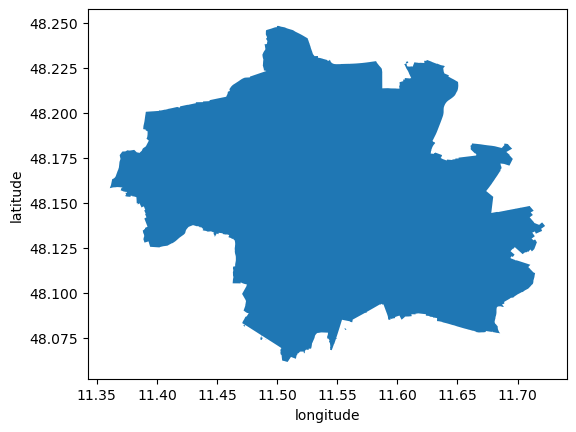

In [6]:
munich = osm.geocode_to_gdf({
    'city': 'München',
    'state': 'Bayern',
    'Country': 'Deutschland'
})

munich.plot()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

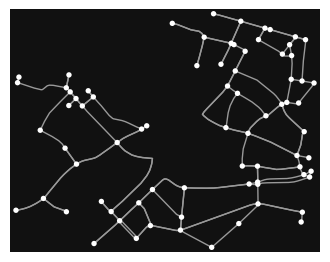

In [43]:
city = "Munich, Germany"

# Geocode the city center
city_center = osm.geocoder.geocode(city)

# Create a network graph within 5 km of the city center
G = osm.graph_from_point(city_center, dist=500, dist_type='bbox', network_type='drive')

# Plot the graph
fig, ax = osm.plot_graph(G, figsize=(4, 4))



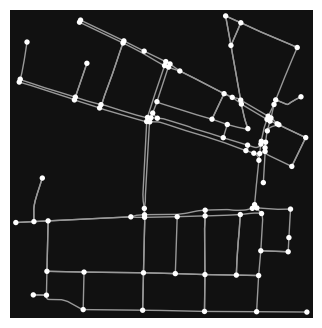

In [42]:
import osmnx as ox

# Specify the location (Marienplatz in Munich)
location = "hbf, Munich, Germany"

# Geocode the city center (Marienplatz)
city_center = ox.geocode(location)

# Create a network graph within 1 km of the city center
# Note: The distance is in meters, so 1000 meters is 1 km
G = ox.graph_from_point(city_center, dist=500, dist_type='bbox', network_type='drive')

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(4, 4))


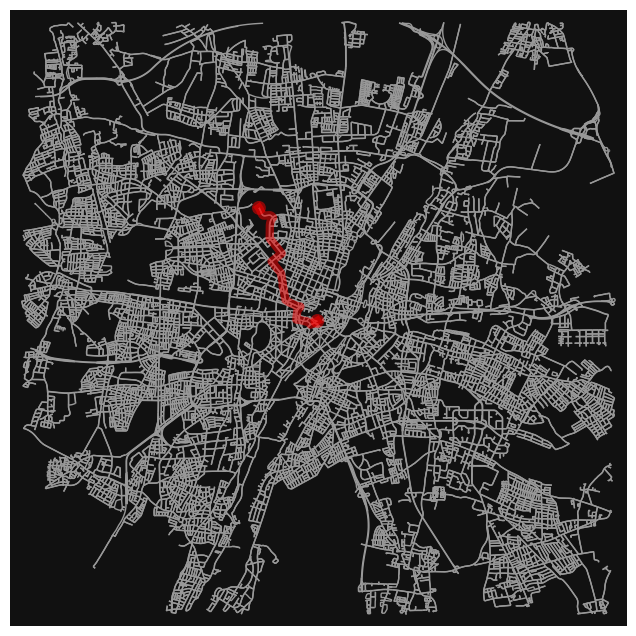

In [46]:
import osmnx as ox
import networkx as nx

# Define locations
locations = {
    "Marienplatz": "Marienplatz, Munich, Germany",
    "Olympiapark": "Olympiapark, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=10000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest path (by length)
route = nx.shortest_path(G, nearest_nodes["Marienplatz"], nearest_nodes["Olympiapark"], weight='length')

# Plot the graph with the route
fig, ax = ox.plot_graph_route(G, route, route_color='red', route_linewidth=6, node_size=0)


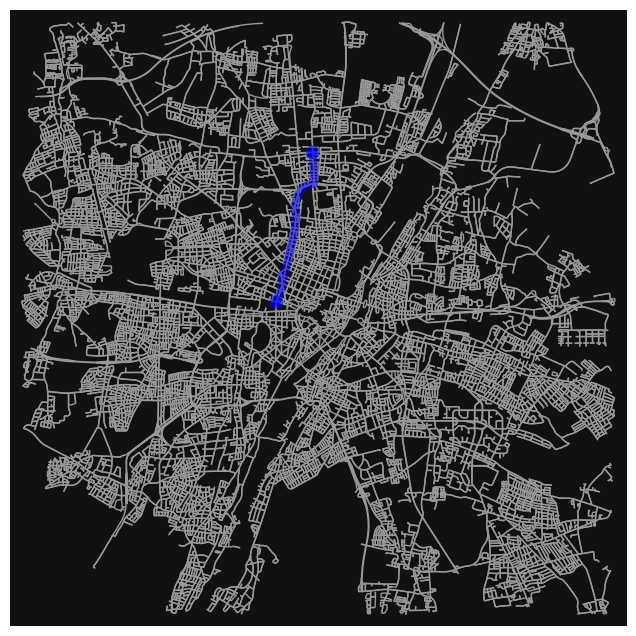

In [50]:
import osmnx as ox
import networkx as nx

# Define locations
locations = {
    "HBF": "HBF, Munich, Germany",
    "BMW": "BMW, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=10000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest path (by length)
route = nx.shortest_path(G, nearest_nodes["HBF"], nearest_nodes["BMW"], weight='length')

# Plot the graph with the route
fig, ax = ox.plot_graph_route(G, route, route_color='blue', route_linewidth=6, node_size=0)



TypeError: unhashable type: 'list'

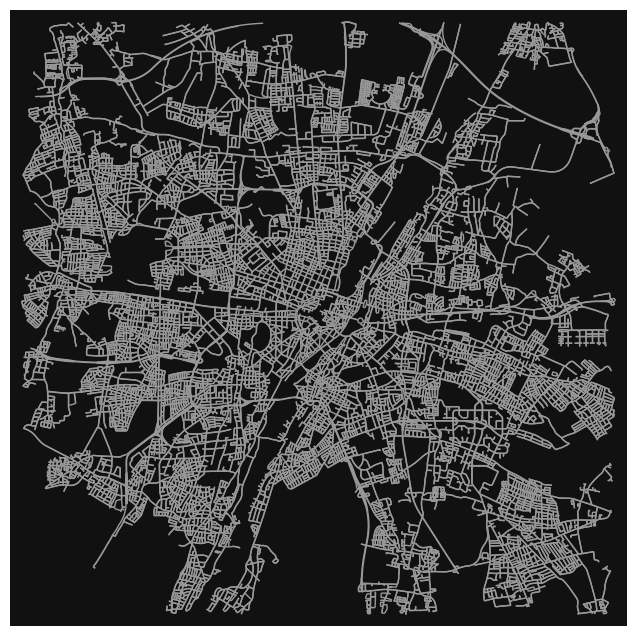

In [53]:
import osmnx as ox
import networkx as nx

# Define locations
locations = {
    "Marienplatz": "Marienplatz, Munich, Germany",
    "Olympiapark": "Olympiapark, Munich, Germany",
    "HBF": "HBF, Munich, Germany",
    "BMW": "BMW, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=10000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest path (by length)
route1 = nx.shortest_path(G, nearest_nodes["Marienplatz"], nearest_nodes["Olympiapark"], weight='length')
route2 = nx.shortest_path(G, nearest_nodes["HBF"], nearest_nodes["BMW"], weight='length')


# Plot the graph with the route
fig, ax = ox.plot_graph_route(G, route1, route_color='red', route_linewidth=6, node_size=0)
fig, ax = ox.plot_graph_route(G, route2, route_color='blue', route_linewidth=6, node_size=0)



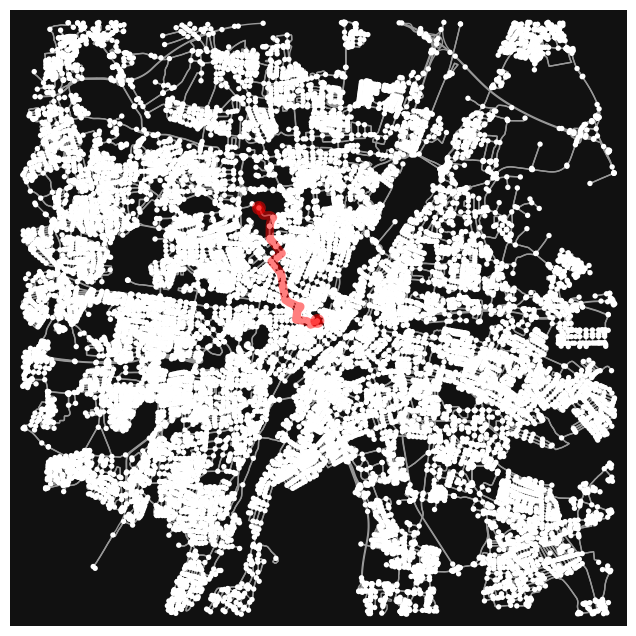

In [49]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define all locations
locations = {
    "Marienplatz": "Marienplatz, Munich, Germany",
    "Olympiapark": "Olympiapark, Munich, Germany",
    "Sendlinger Tor": "Sendlinger Tor, Munich, Germany",
    "Technical University of Munich": "Technical University of Munich, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=10000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest path (by length) for both routes
route1 = nx.shortest_path(G, nearest_nodes["Marienplatz"], nearest_nodes["Olympiapark"], weight='length')
route2 = nx.shortest_path(G, nearest_nodes["Sendlinger Tor"], nearest_nodes["Technical University of Munich"], weight='length')

# Plot the graph with both routes
fig, ax = ox.plot_graph(G, show=False, close=False)
ox.plot_graph_route(G, route1, route_color='red', route_linewidth=6, node_size=0, ax=ax)
ox.plot_graph_route(G, route2, route_color='blue', route_linewidth=6, node_size=0, ax=ax)

plt.show()
